# 4.9 Data Visualization with Python Part 2

# 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#Import updated ords_prods_cust_merge_ dataframe
ords_prods_cust_merge_ = pd.read_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/2 Data/2 Prepared Data/ords_prods_cust_merge_')

In [5]:
#Check to make sure it imported correctly
ords_prods_cust_merge_.head()

,order_id,user_id,order_number,orders_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income,merge_status_new
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
#Check shape
ords_prods_cust_merge_.shape

(32404859, 33)

# 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

# Bar Charts

<Axes: xlabel='orders_dow'>

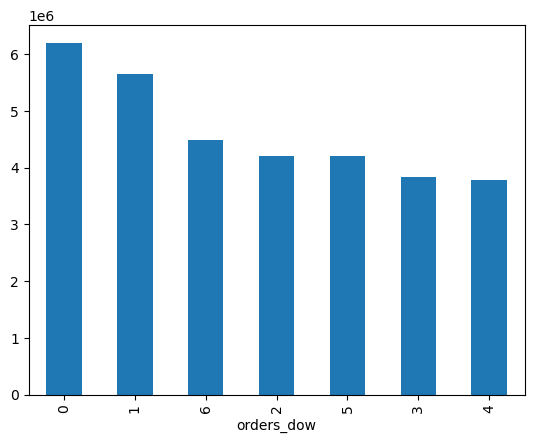

In [9]:
#Create bar chart for orders_dow column
ords_prods_cust_merge_['orders_dow'].value_counts().plot.bar()

<Axes: xlabel='orders_dow'>

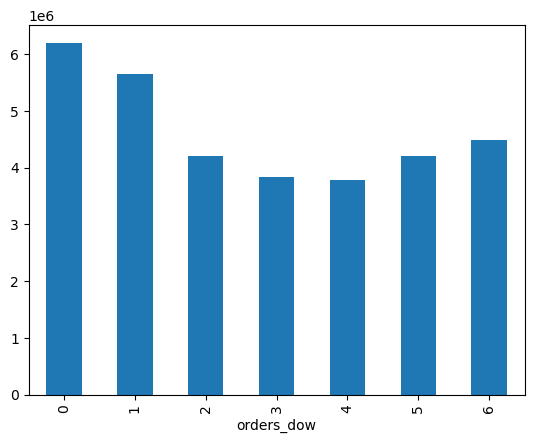

In [10]:
#Create same bar chart but keeping the days of the week in order
ords_prods_cust_merge_['orders_dow'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_dow'>

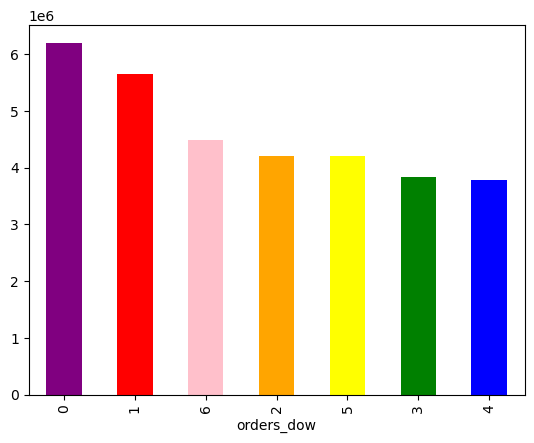

In [11]:
#Create same bar chart, but with color
ords_prods_cust_merge_['orders_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Histogram

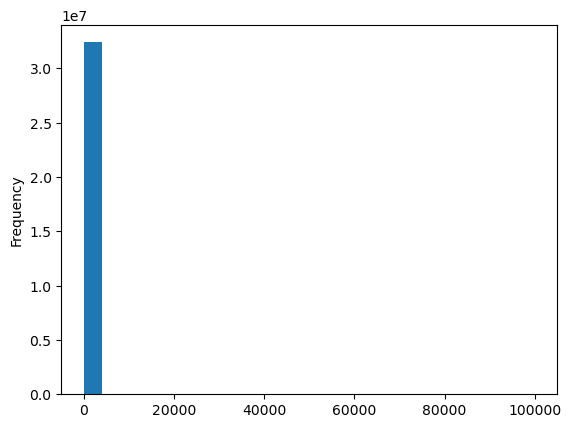

In [13]:
#Create histogram for 'prices' and put in bins of 25
hist = ords_prods_cust_merge_['prices'].plot.hist(bins = 25)

In [14]:
#Check descriptive statistics
ords_prods_cust_merge_['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

$99,999 is a very high max value. It is likely an outlier or a data entry error.

<Axes: xlabel='prices', ylabel='prices'>

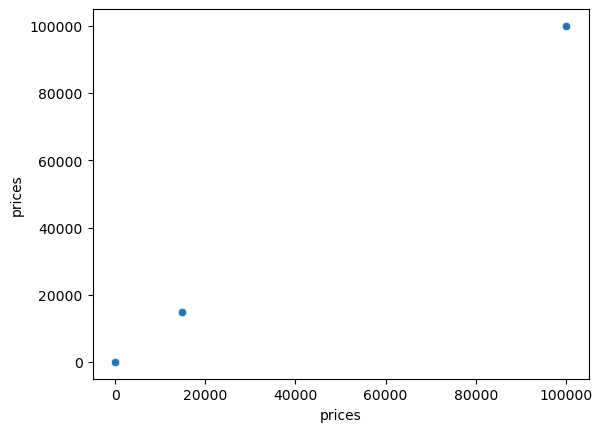

In [16]:
#Create a scatterplot to check for outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust_merge_)

In [17]:
#Check to see which items are more expensive than $100 
ords_prods_cust_merge_.loc[ords_prods_cust_merge_['prices'] > 100]

,order_id,user_id,order_number,orders_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income,merge_status_new
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,NaN,Chen,Female,Maryland,30,3/19/2017,3,married,120635,both
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,NaN,Chen,Female,Maryland,30,3/19/2017,3,married,120635,both
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,Ruby,Bates,Female,Minnesota,56,8/23/2018,2,married,187328,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,Jeremy,Vang,Male,Kentucky,62,10/2/2017,0,divorced/widowed,302526,both
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,James,Hunter,Male,Maryland,60,7/12/2019,1,married,172539,both
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,James,Hunter,Male,Maryland,60,7/12/2019,1,married,172539,both
32380527,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,Louise,Leal,Female,District of Columbia,23,4/26/2019,1,married,169022,both


In [18]:
#Change all 'prices' over $100 into missing values
ords_prods_cust_merge_.loc[ords_prods_cust_merge_['prices'] >100, 'prices'] = np.nan

In [19]:
#Check to ensure it worked
ords_prods_cust_merge_['prices'].max()

25.0

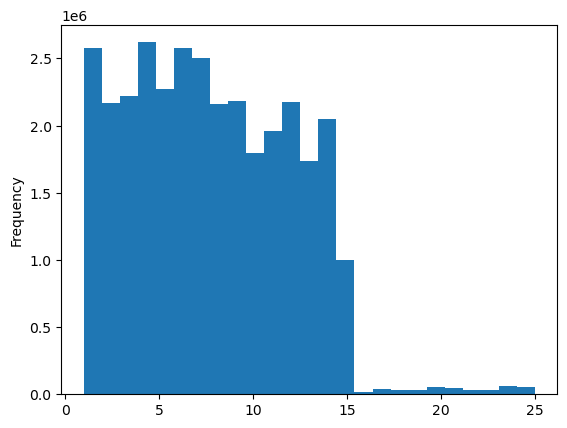

In [20]:
#Try histogram again now that outliers have been dealt with
hist = ords_prods_cust_merge_['prices'].plot.hist(bins = 25)

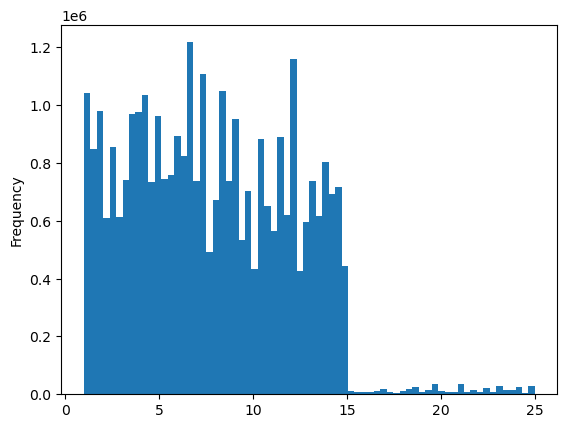

In [21]:
#Redo histogram again with 70 bins
hist = ords_prods_cust_merge_['prices'].plot.hist(bins = 70)

# Creating Line Charts & Sampling Data

In [23]:
#Create a sample of the data using a 70/30 ratio
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge_)) <= 0.7

In [24]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
#Store 70% of the sample in the dataframe 'big'
big = ords_prods_cust_merge_[dev]

In [26]:
#Store 30% of the sample in the dataframe 'small'
small = ords_prods_cust_merge_[~dev]

In [27]:
#Check to ensure that the 'big' and 'small' dataframes still include same number of rows
len(ords_prods_cust_merge_)

32404859

In [28]:
#Check 'big' and 'small' combined to ensure same result
len(big) + len(small)

32404859

In [29]:
#Reduce memory by reducing samples to only include necessary data; 'orders_dow' and 'prices'
df_2 = small[['orders_dow','prices']]

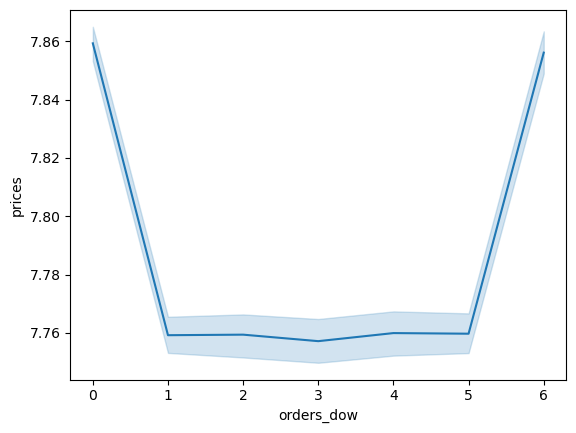

In [30]:
#Create a line chart to show 'prices' by 'orders_dow'
line2 = sns.lineplot(data = df_2, x = 'orders_dow',y = 'prices')

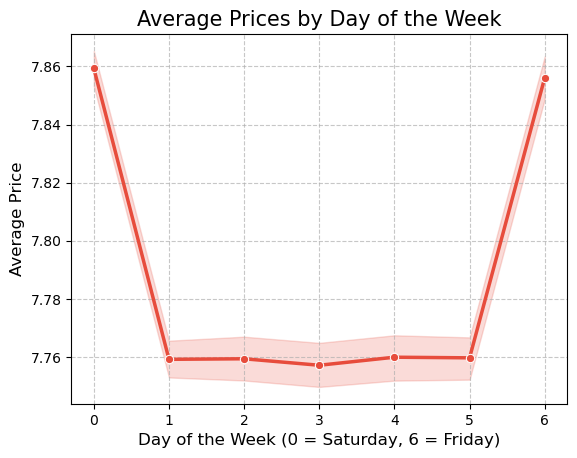

In [100]:
#Recreate the line chart to show 'prices' by 'orders_dow' with title and axis labels
line2 = sns.lineplot(data=df_2, x='orders_dow', y='prices', color='#e74c3c', linewidth=2.5, marker='o', markersize=6) 
plt.title('Average Prices by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week (0 = Saturday, 6 = Friday)', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

# Adding grid lines for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [102]:
#Export the prices by order_hour_of_day line chart
line2.figure.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'line_prices_dow_final'))

# 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

In a markdown cell beneath your histogram, describe what the histogram demonstrates.

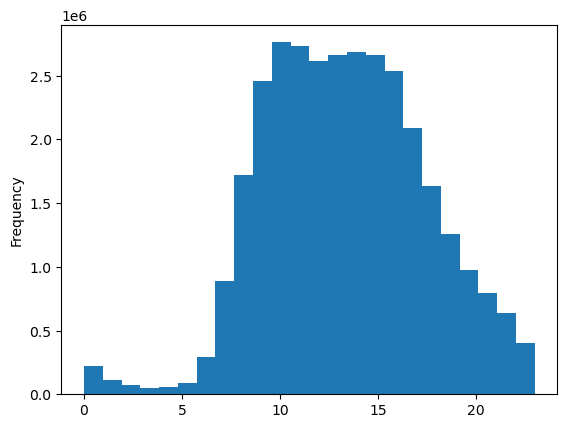

In [33]:
#Create histogram for 'order_hour_of_day' column with 24 bins
hist = ords_prods_cust_merge_['order_hour_of_day'].plot.hist(bins = 24)

This histogram shows that Instacart orders place the vast majority of their orders during the day. There are much fewer orders placed late at night between midnight and 5:00 am. The busiest hours to place orders is between 8:00 am- 3:00 pm.

# 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

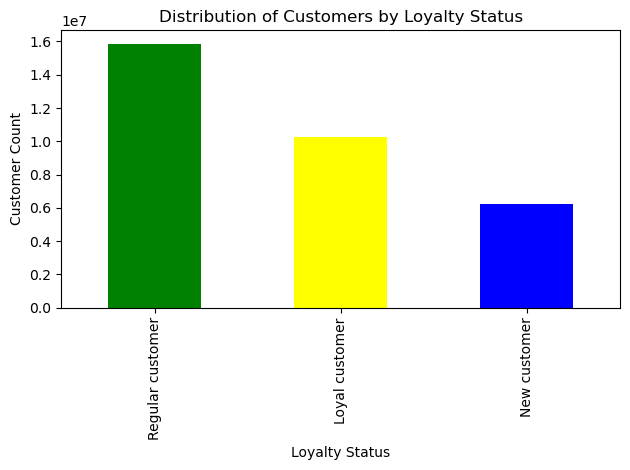

In [104]:
# Create a bar chart showing the distribution of customers' loyalty_flag
ords_prods_cust_merge_['loyalty_flag'].value_counts().plot(kind='bar', color=['green', 'yellow', 'blue'])
plt.title("Distribution of Customers by Loyalty Status")
plt.xlabel("Loyalty Status")
plt.ylabel("Customer Count")

# Adjust layout to fit all labels
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'loyalty_distribution.png'))

# Display the plot
plt.show()

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

I will use the 'small' sample dataframe from question 3.

In [39]:
#Reduce memory by reducing samples to only include necessary data; 'order_hour_of_day' and 'prices'
df_3 = small[['order_hour_of_day','prices']]

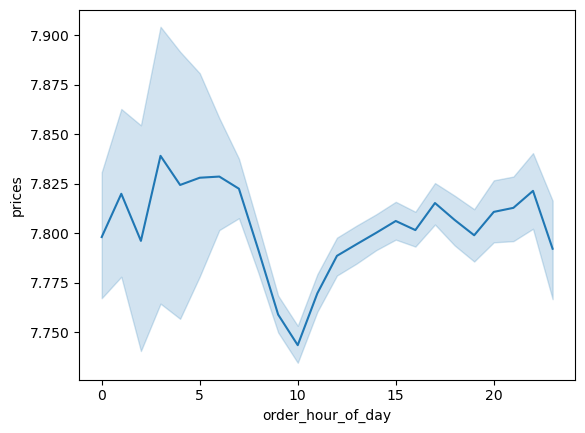

In [40]:
#Create a line chart to show 'prices' by 'order_hour_of_day'
line4 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

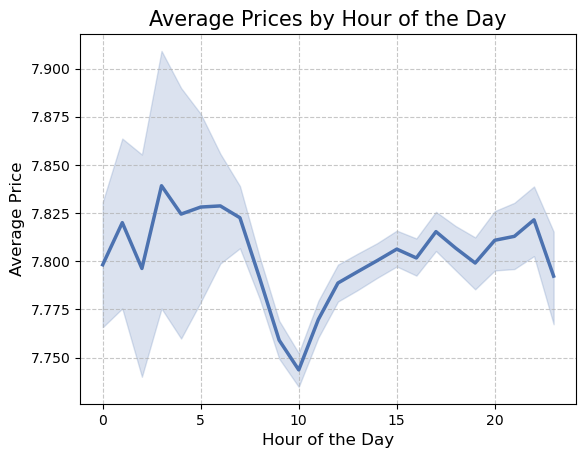

In [96]:
#Recreate the line chart to show 'prices' by 'order_hour_of_day' with Title and axis labels
line4 = sns.lineplot(data=df_3, x='order_hour_of_day', y='prices', color='#4c72b0', linewidth=2.5)
plt.title('Average Prices by Hour of the Day', fontsize=15)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

# Adding grid lines for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [42]:
#Check head() to ensure correct column names
small.head()

,order_id,user_id,order_number,orders_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income,merge_status_new
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
10,2398795,1,2,3,7,15.0,13032,6,0,Cinnamon Toast Crunch,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [43]:
#Reduce memory by reducing samples to only include necessary data; 'age' and 'n-dependants'
df_4 = small[['Age','n_dependants']]

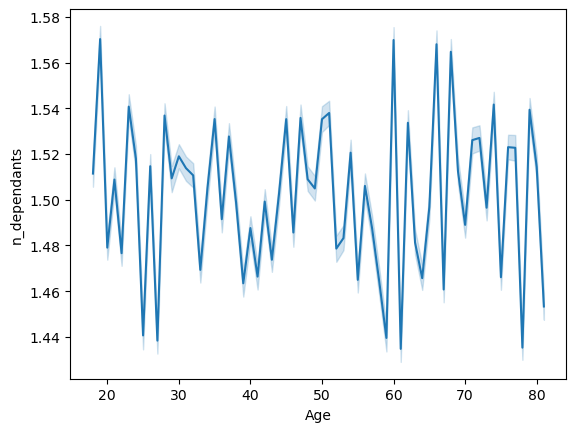

In [44]:
#Create a line chart to show 'dependents' by 'age'
line = sns.lineplot(data = df_4, x = 'Age',y = 'n_dependants')

This line chart shows that there is no strong relationship between age and number of dependants of Instacart customers.  

# 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

<Axes: xlabel='Age', ylabel='income'>

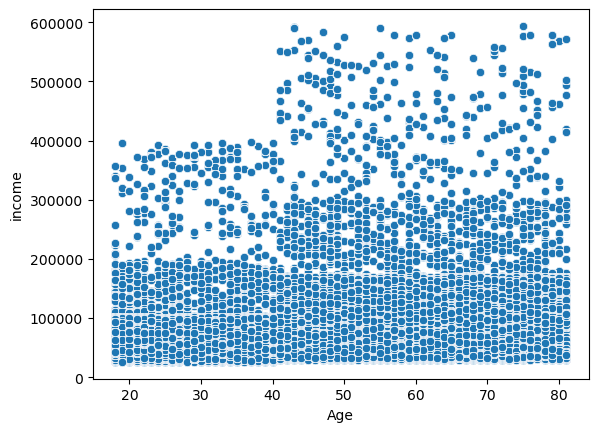

In [47]:
#Create a scatterplot to check for a connection between age and income.  Use 'small' sample to reduce memory
sns.scatterplot(x = 'Age', y = 'income',data = small)

The scatterplot shows that there is not a strong relationship between age and income.  You can see that there are almost 0 customers under 40 years old that make over 400,000, but 40+, there are some customers making up to 600,000.  You can also clearly see the scatterplot is very dense under the 200,000 range, meaning that the majority of Instacart customers make under 200,000.

# 8. Export your visualizations as “.png” files in your relevant project folder.

In [50]:
# Export the order_hour_of_day histogram 
hist.figure.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'hist_order_hour_of_day.png'))

In [51]:
# Export the prices by order_dow line chart
line2.figure.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'line_prices_dow'))

In [52]:
# Export the prices by order_hour_of_day line chart
line3.figure.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'line_prices_hour_of_day'))

# 8. Save your notebook from part 2 of this Exercise’s task.

Done.